Используя библиотеку PyTorch, решите задачу регрессии. Разделите набор данных на обучающее и тестовое множество. Выполните предобработку данных. Отобразите графики значений функции потерь и метрики R^2 на обучающем множестве. Рассчитайте значение метрики R^2 на тестовом множестве.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Предварительный анализ

## Чтение данных из файла

In [ ]:
df = pd.read_csv("concrete.csv")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   strength                                         

In [ ]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
df.shape

(1030, 9)

In [ ]:
df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)': 'Cement',
                    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast_Furnace_Slag',
                    'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash',
                    'Water  (component 4)(kg in a m^3 mixture)':'Water',
                    'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
                    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse_Aggregate',
                    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine_Aggregate',
                    'Age (day)':'Age',
                   'strength':'strength'
                  }, inplace=True)

In [ ]:
df.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'strength'],
      dtype='object')

# Визуализация

In [ ]:
# sns.catplot(data=df, x="Node_Number", y="Channel_Waiting_Time", hue="Thread_Number", kind="bar")
# plt.show()

In [ ]:
# plt.figure(figsize=(10,5))
# sns.histplot(df['Channel_Waiting_Time'], kde=True)
# plt.title("Distribution of 'Channel Waiting Time'")
# plt.xlabel("Channel Waiting Time")
# plt.ylabel("Frequency")
# plt.show()

### Матрица корреляции

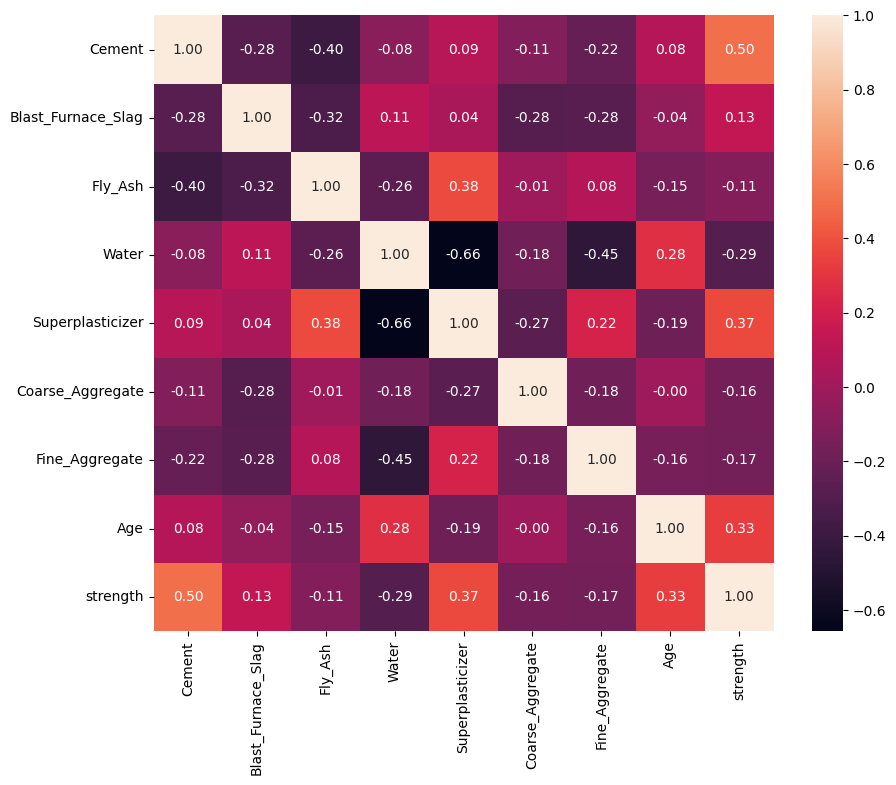

In [ ]:
# Создание графика и задание его размеров
fig = plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(), annot = True, fmt=".2f") # annot добавляет значение корреляции

# Отображение графика
plt.show()

### Диаграмма рассеяния

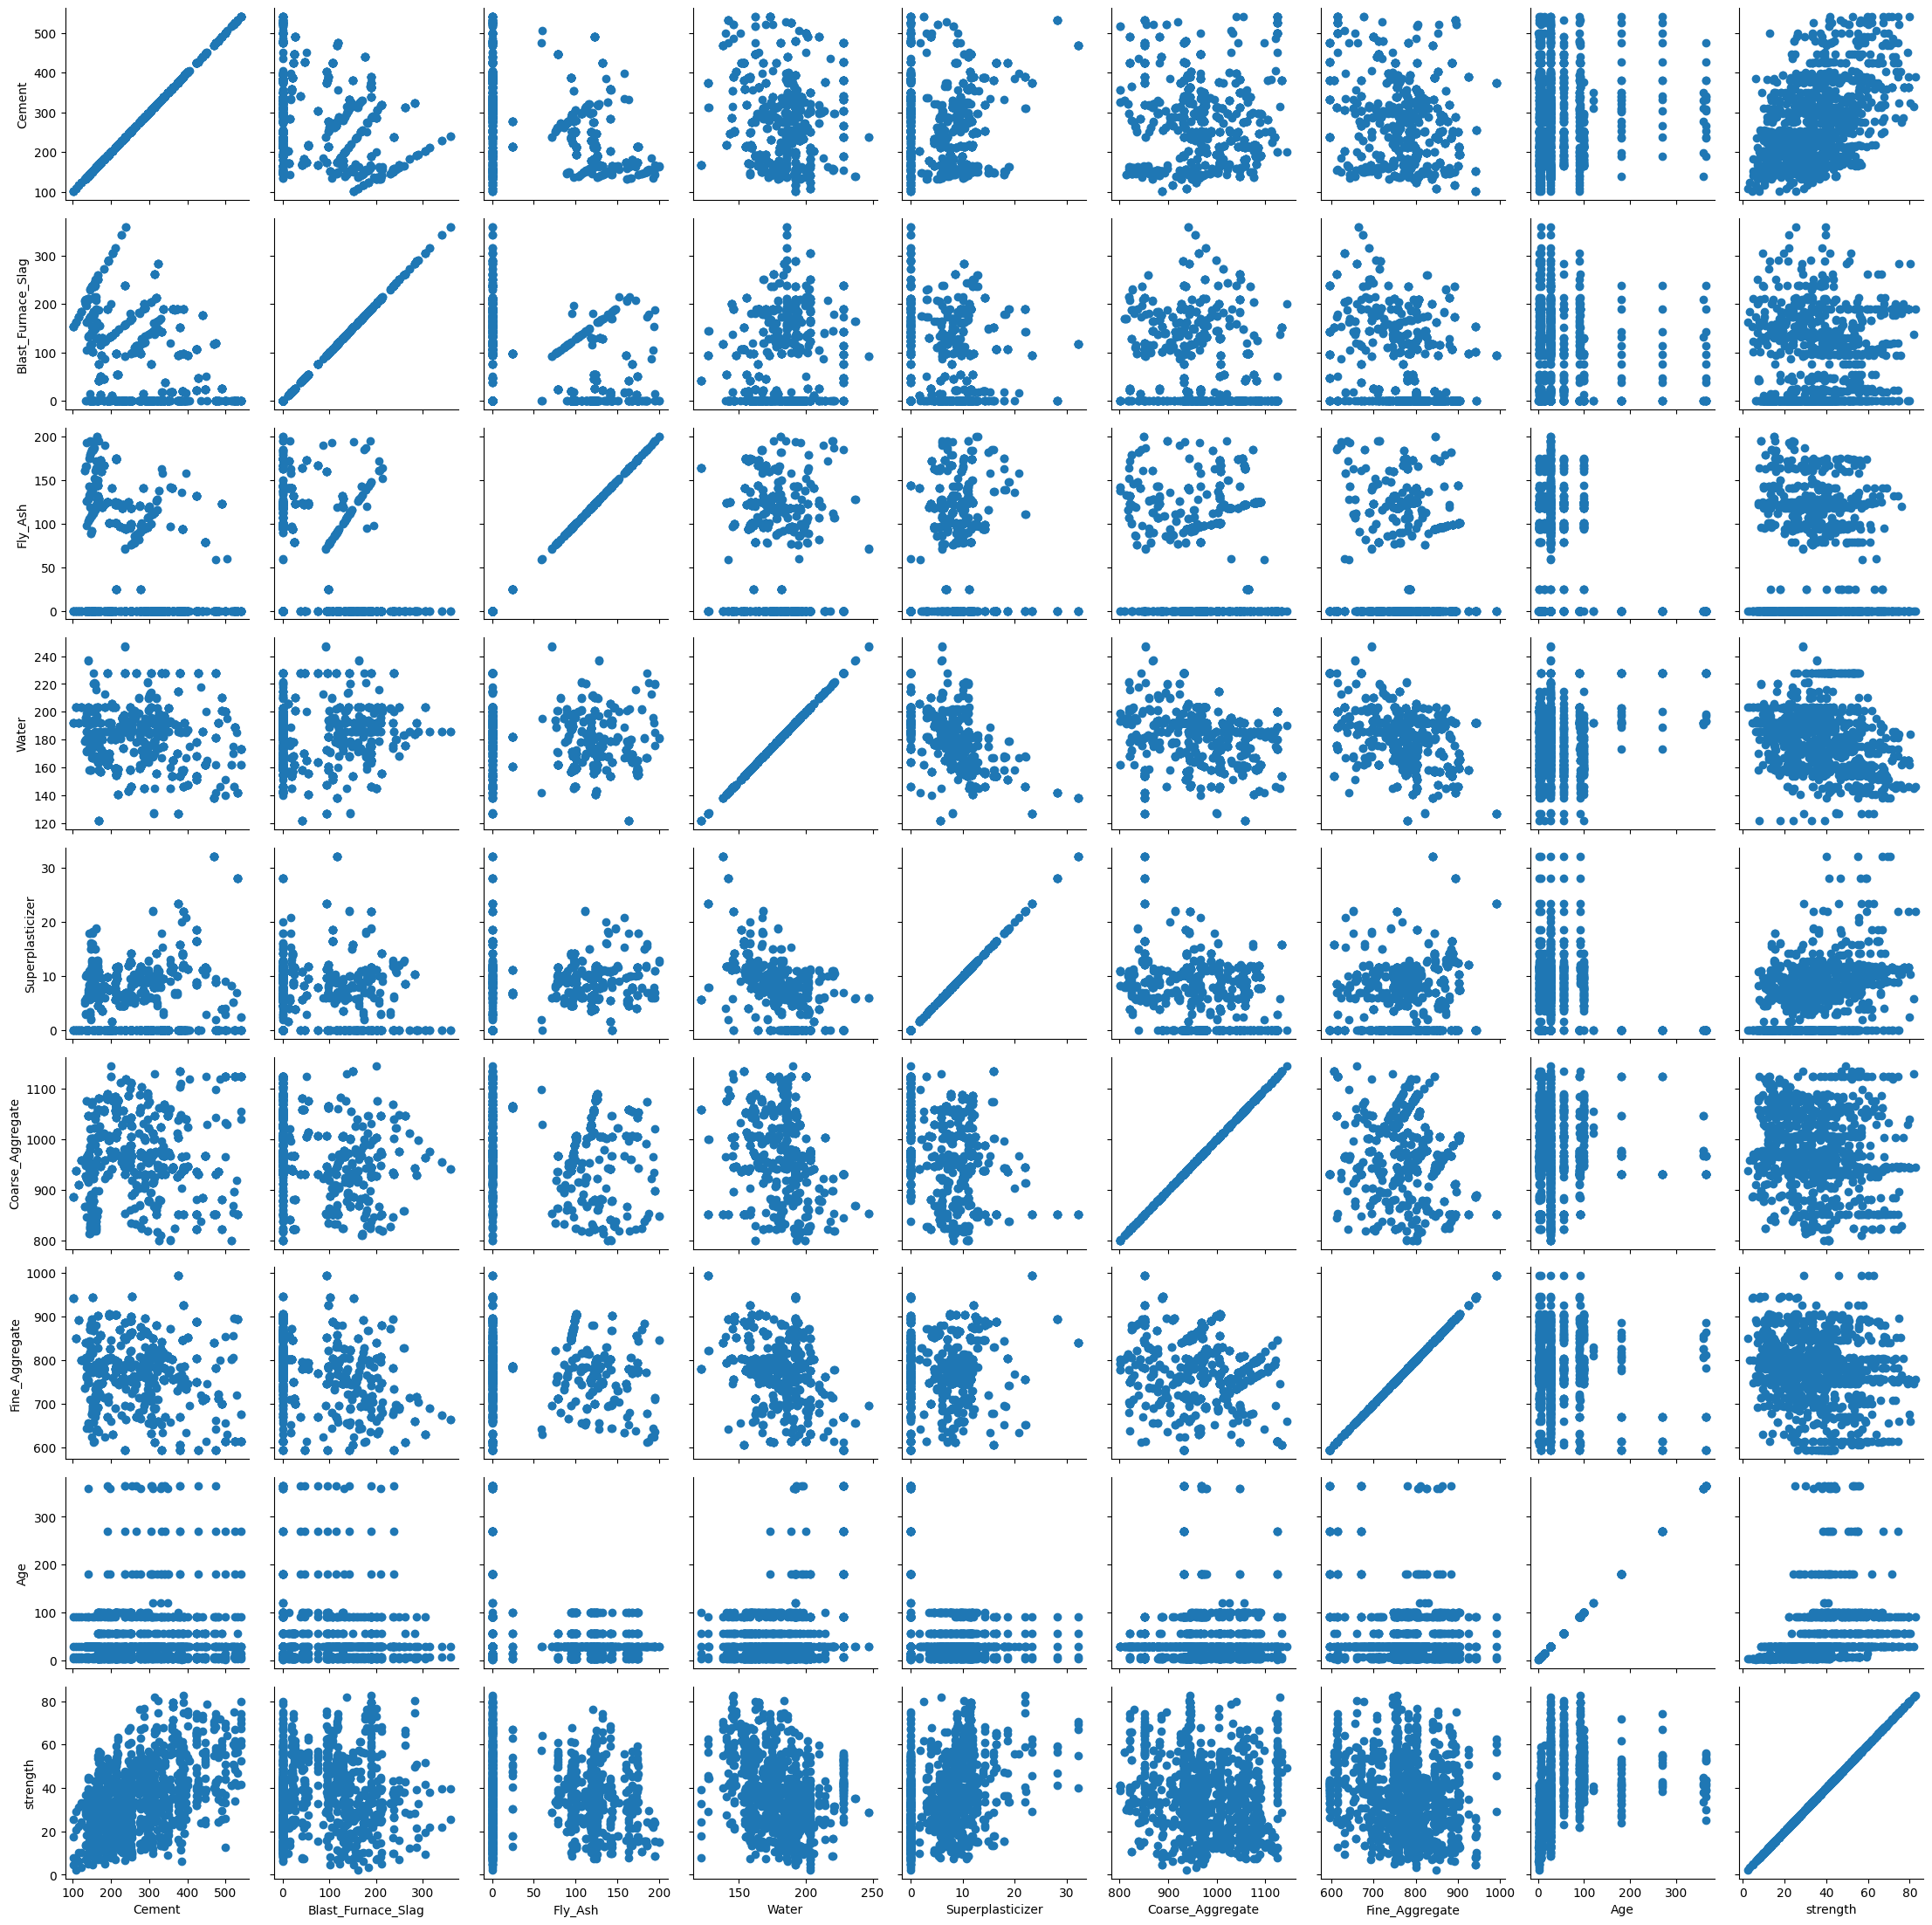

In [ ]:
graph = sns.PairGrid(df) # строим сетку по 2 признакам для каждого столбца таблицы
graph.map(plt.scatter) # строим графики из точек для всех элементов списка
plt.show()

# Оценка качества данныx

## Проверка наличия пропусков данных

In [ ]:
df.nunique() # количество уникальных значений в каждом столбце

Cement                                                  278
Blast_Furnace_Slag                                      185
Fly_Ash                                                 156
Water  (component 4)(kg in a m^3 mixture)               195
Superplasticizer                                        111
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    284
Fine_Aggregate                                          302
Age                                                      14
strength                                                845
dtype: int64

In [ ]:
df.isna().sum(axis=0) # пропущенные значения

Cement                                                  0
Blast_Furnace_Slag                                      0
Fly_Ash                                                 0
Water  (component 4)(kg in a m^3 mixture)               0
Superplasticizer                                        0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    0
Fine_Aggregate                                          0
Age                                                     0
strength                                                0
dtype: int64

Пропущенные значения отсутствуют

## Заполнение пропущенных значений

In [ ]:
# df['A'].fillna(df['A'].mode()[0], inplace=True)
# df['B'].fillna(0, inplace=True) #0
# df['C'].fillna(df['C'].mean()[0], inplace=True)

## Изучение выбросов

Строим ящик с усами для числовых признаков

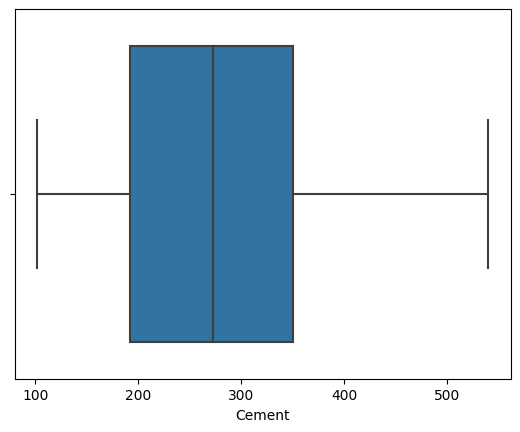

In [ ]:
sns.boxplot(data=df, x="Cement")
plt.show()

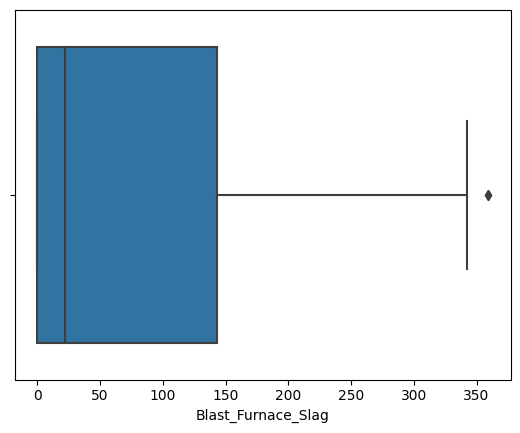

In [ ]:
sns.boxplot(data=df, x="Blast_Furnace_Slag")
plt.show()

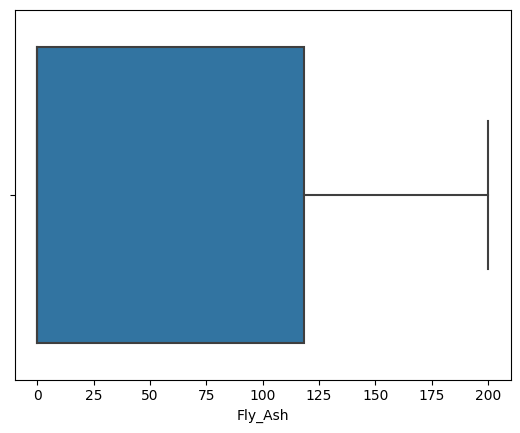

In [ ]:
sns.boxplot(data=df, x="Fly_Ash")
plt.show()

In [ ]:
# Определим диапазон выбросов
def get_clean(df, column):
    # Определяем первый и третий квартили и межквартильный размах
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Определяем границы выбросов на основе межквартильного размаха
    lower = q1-iqr*1.5
    upper = q3+iqr*1.5

    # Отбираем только те строки, где значение столбца column находится внутри границ выбросов
    df_clean = df[(upper>=df[column]) & (lower<=df[column])]

    # Возвращаем новый датафрейм без выбросов
    return df_clean

In [ ]:
df.Blast_Furnace_Slag.shape

(1030,)

In [ ]:
a = get_clean(df, "Blast_Furnace_Slag")
a

,Cement,Blast_Furnace_Slag,Fly_Ash,Water (component 4)(kg in a m^3 mixture),Superplasticizer,Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine_Aggregate,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
a.Blast_Furnace_Slag.shape

(1028,)

## Очистка данных (Data Cleaning)

### Удаление дубликатов

In [ ]:
df = df.drop_duplicates()

### Удаление отсутствующих значений

In [ ]:
df = df.dropna()

# Разделение данных (Data Splitting)

In [ ]:
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
y = pd.DataFrame(df['strength'])
y.head()

,strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


In [ ]:
x = pd.DataFrame(df.drop(columns=['strength']))
x.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [ ]:
from sklearn.preprocessing import normalize

x = normalize(x)

In [ ]:
from sklearn.model_selection import train_test_split

# Деление на тренировочную и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Обучение моделей

In [ ]:
scores = pd.DataFrame(
    columns=['mean_absolute_error', 'mean_squared_error', 'r2_score', 'explained_variance_score', 'duration'],
    index=[
        'RandomForestRegressor',
        'GradientBoostingRegressor',
        'KNeighborsRegressor'
    ]
)

Функция для получения метрик качества моделей

In [ ]:
from sklearn import metrics

def get_metrics(y_test, y_pred):
    mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
    mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
    r2_score = metrics.r2_score(y_test, y_pred)
    explained_variance_score = metrics.explained_variance_score(y_test, y_pred)
    return pd.Series(
        (mean_absolute_error, mean_squared_error, r2_score, explained_variance_score),
        index=['mean_absolute_error', 'mean_squared_error', 'r2_score', 'explained_variance_score']
    )

Mean Absolute Error (MAE) - это метрика оценки качества модели в задачах регрессии. Она измеряет среднее абсолютное отклонение предсказанных значений от фактических значений целевой переменной.

Для вычисления MAE сначала вычисляются абсолютные значения разностей между предсказанными и фактическими значениями для каждого наблюдения. Затем берется среднее значение этих абсолютных разностей.

MAE позволяет оценить, насколько в среднем модель ошибается в предсказании значений целевой переменной. Чем меньше значение MAE, тем лучше модель. MAE выражается в тех же единицах, что и целевая переменная, что делает его легко интерпретируемым.

Mean Squared Error (MSE) - это метрика оценки качества модели в задачах регрессии. Она измеряет среднее значение квадратов разностей между предсказанными и фактическими значениями целевой переменной.

Для вычисления MSE сначала вычисляются квадраты разностей между предсказанными и фактическими значениями для каждого наблюдения. Затем берется среднее значение этих квадратов.

MSE позволяет оценить, насколько хорошо модель приближает фактические значения целевой переменной. Чем меньше значение MSE, тем лучше модель. MSE выражается в квадрате единицы целевой переменной, что делает его несколько сложнее интерпретируемым, чем MAE.

R2 Score (также известный как коэффициент детерминации) - это метрика оценки качества модели в задачах регрессии. Он измеряет пропорцию дисперсии целевой переменной, которая может быть объяснена моделью, по сравнению с общей дисперсией целевой переменной.

Значение R2 Score находится в диапазоне от 0 до 1. Значение 1 означает, что модель идеально объясняет вариацию в данных, а значение 0 означает, что модель не объясняет никакой вариации и ее предсказания равны среднему значению целевой переменной.

R2 Score можно интерпретировать как долю объясненной вариации в данных. Чем ближе значение R2 Score к 1, тем лучше модель объясняет данные. Значение R2 Score меньше 0 может указывать на то, что модель производит предсказания хуже, чем простое среднее значение.

Explained Variance Score (Оценка объясненной дисперсии) является метрикой оценки качества модели в задачах регрессии. Она измеряет пропорцию объясненной дисперсии моделью относительно общей дисперсии целевой переменной.

Значение Explained Variance Score также находится в диапазоне от 0 до 1. Значение 1 означает, что модель идеально объясняет всю дисперсию в данных, а значение 0 означает, что модель не объясняет никакую вариацию.

Explained Variance Score позволяет оценить, насколько хорошо модель справляется с объяснением вариации в данных. Чем ближе значение Explained Variance Score к 1, тем лучше модель объясняет данные. Значение ниже 0 может указывать на то, что модель предсказывает хуже, чем простое среднее значение целевой переменной.

Функция обучения и записи времени процесса обучения модели в секундах

In [ ]:
import time
from sklearn.model_selection import learning_curve

In [ ]:
def model_and_metrics(model):

    # начало обучения модели
    start = time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    # конец обучения модели
    end = time.time()

    # График обучения
    train_sizes, train_scores, valid_scores = learning_curve(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    train_scores_mean = -np.mean(train_scores, axis=1)
    valid_scores_mean = -np.mean(valid_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training')
    plt.plot(train_sizes, valid_scores_mean, 'o-', color='g', label='Validation')
    plt.xlabel('Training examples')
    plt.ylabel('Negative Mean Squared Error')
    plt.legend(loc='best')
    plt.show()

    duration = pd.Series([end - start])
    returned = pd.concat([get_metrics(y_test, y_pred), duration])
    return returned

In [ ]:
'RandomForestRegressor',
        'GradientBoostingRegressor',
        'KNeighborsRegressor'
    ]

### #1 Classic model (RandomForestRegressor)

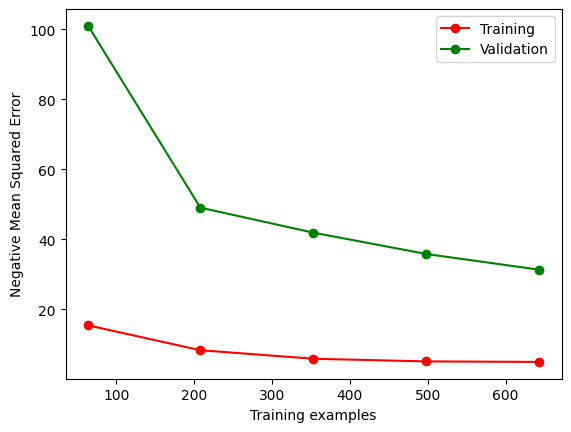

In [ ]:
from sklearn.ensemble import RandomForestRegressor

scores.iloc[0] = model_and_metrics(RandomForestRegressor())

#2 Classic model (GradientBoostingRegressor)

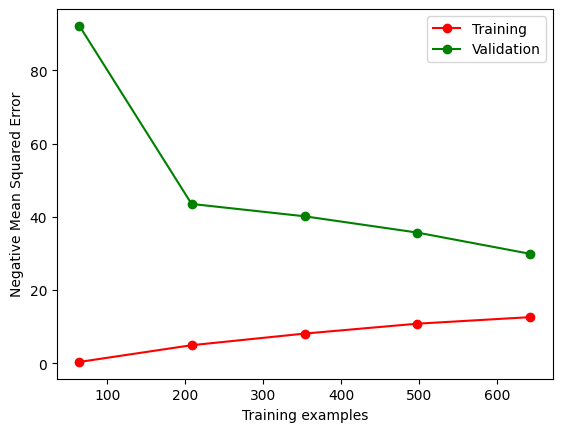

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

scores.iloc[1] = model_and_metrics(GradientBoostingRegressor())

### #3 Classic model (KNeighborsRegressor)

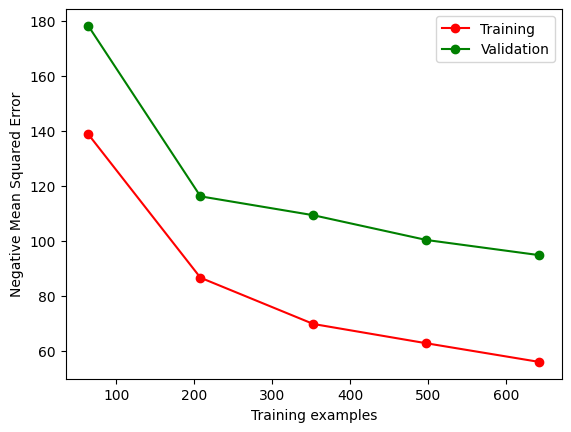

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

scores.iloc[2] = model_and_metrics(KNeighborsRegressor(n_neighbors=5))

# Анализ процесса обучения

In [ ]:
scores

,mean_absolute_error,mean_squared_error,r2_score,explained_variance_score,duration
RandomForestRegressor,3.847236,37.531476,0.874193,0.875129,0.831366
GradientBoostingRegressor,4.153778,35.959589,0.879462,0.881315,0.398803
KNeighborsRegressor,7.380338,95.997848,0.67821,0.683819,0.02335


# Нейронные сети

In [ ]:
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch
from sklearn.metrics import r2_score

In [ ]:
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y.values)
        self.n_samples = self.X.size(0)

    def __len__(self):
        return self.n_samples

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(in_features=8, out_features=15),
            nn.Sigmoid(),
            nn.Linear(in_features=15, out_features=1)
        )

    def forward(self, x):
        x = self.fc(x)
        return x

In [ ]:
# model = nn.Sequential(
#     nn.Linear(in_features=9, out_features=50),
#     nn.ReLU(),
#     nn.Linear(in_features=50, out_features=1)
# )

In [ ]:
train_set = MyDataset(x_train, y_train)
test_set = MyDataset(x_test, y_test)

train_dataloader = DataLoader(train_set, batch_size=8)
test_dataloader = DataLoader(test_set, batch_size=100)

model = MyModel()
optimizer = optim.Adam(model.parameters(), lr=0.1)
criterion = nn.MSELoss()

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

In [ ]:
for epoch in range(100):
    model.train()
    for x, y in train_dataloader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        for x, y in test_dataloader:
            x, y = x.to(device), y.to(device)
            y_pred = model(x)
            mean_absolute = metrics.mean_absolute_error(y_pred.cpu(), y)
            mean_squared = metrics.mean_squared_error(y_pred.cpu(), y)
            r2 = metrics.r2_score(y_pred.cpu(), y)
            explained_variance = metrics.explained_variance_score(y_pred.cpu(), y)
    if epoch %10 == 0:
        print(mean_absolute.item()) # .item()

1.0309696197509766
1.0969867706298828
1.1516761779785156
1.18505859375
1.1922321319580078
1.1851615905761719
1.1809005737304688
1.1824684143066406
1.1818466186523438
1.1676292419433594


In [ ]:
model.eval()
x, y = next(iter(test_dataloader))
y_pred = model(x).cpu().detach().numpy()

Метрики качества: 
MAE: 1.1532879 
MSE: 1.330073 
R2: nan 
EV: 1.0


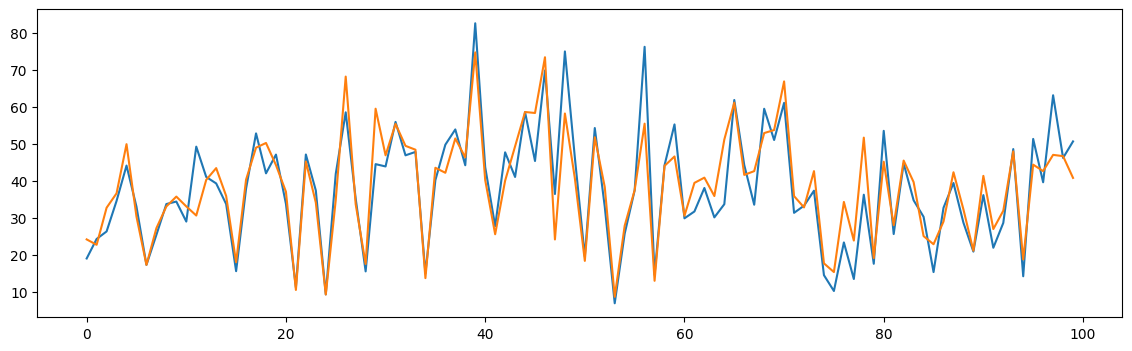

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(y)
plt.plot(y_pred);

print('Метрики качества:','\n'
      'MAE:',mean_absolute,'\n'
      'MSE:', mean_squared,'\n'
      'R2:', r2,'\n'
      'EV:', explained_variance
      )